# DATOS

In [14]:
# Import de bibliotecas necesarias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Cargamos el dataset de canciones desde el archivo .CSV
df = pd.read_csv("Crimenes.csv")

# Eliminamos las columnas que no dan informacion relevante para un analisis
df.head()

X = df[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']]

In [16]:
df.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


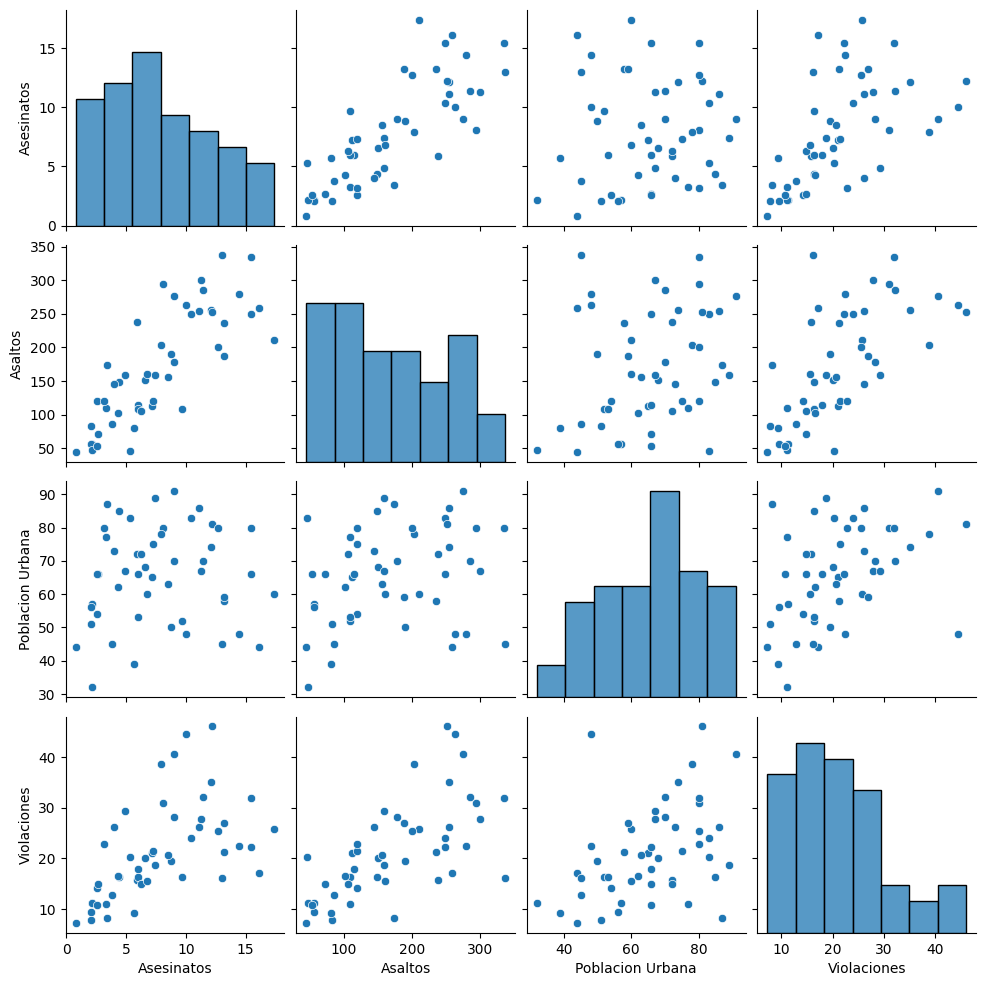

In [17]:
sns.pairplot(df)
plt.show()

# KMEANS

c:\Users\piamp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\piamp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\piamp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\piamp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

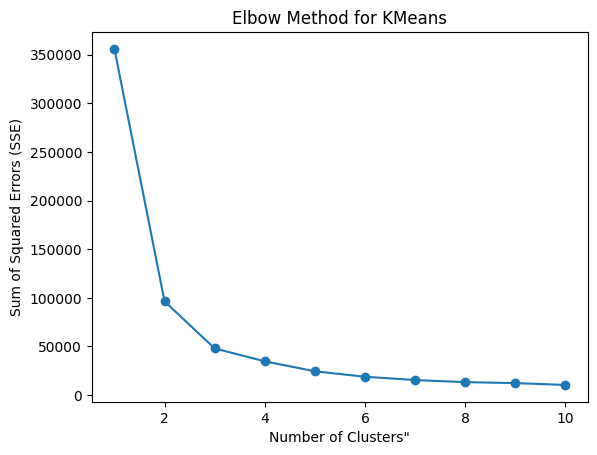

In [18]:
sse = []

# Probamos con un rango de valores de k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Graficamos el método del codo
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of Clusters"')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

c:\Users\piamp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


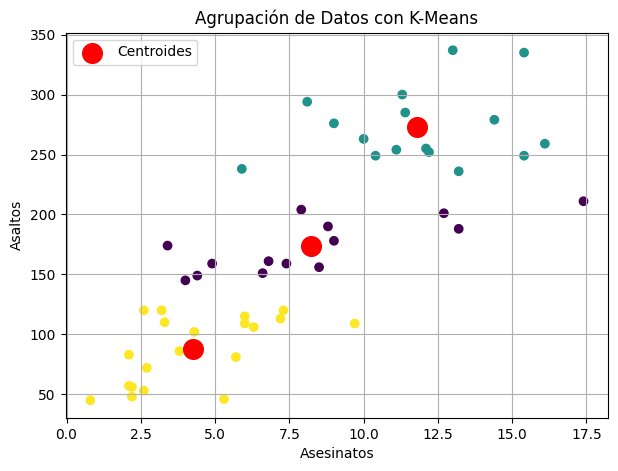

In [19]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(7, 5))
plt.scatter(X['Asesinatos'], X['Asaltos'], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='o', label='Centroides')

plt.xlabel('Asesinatos')
plt.ylabel('Asaltos')
plt.title('Agrupación de Datos con K-Means')
plt.grid(True)
plt.legend()
plt.show()

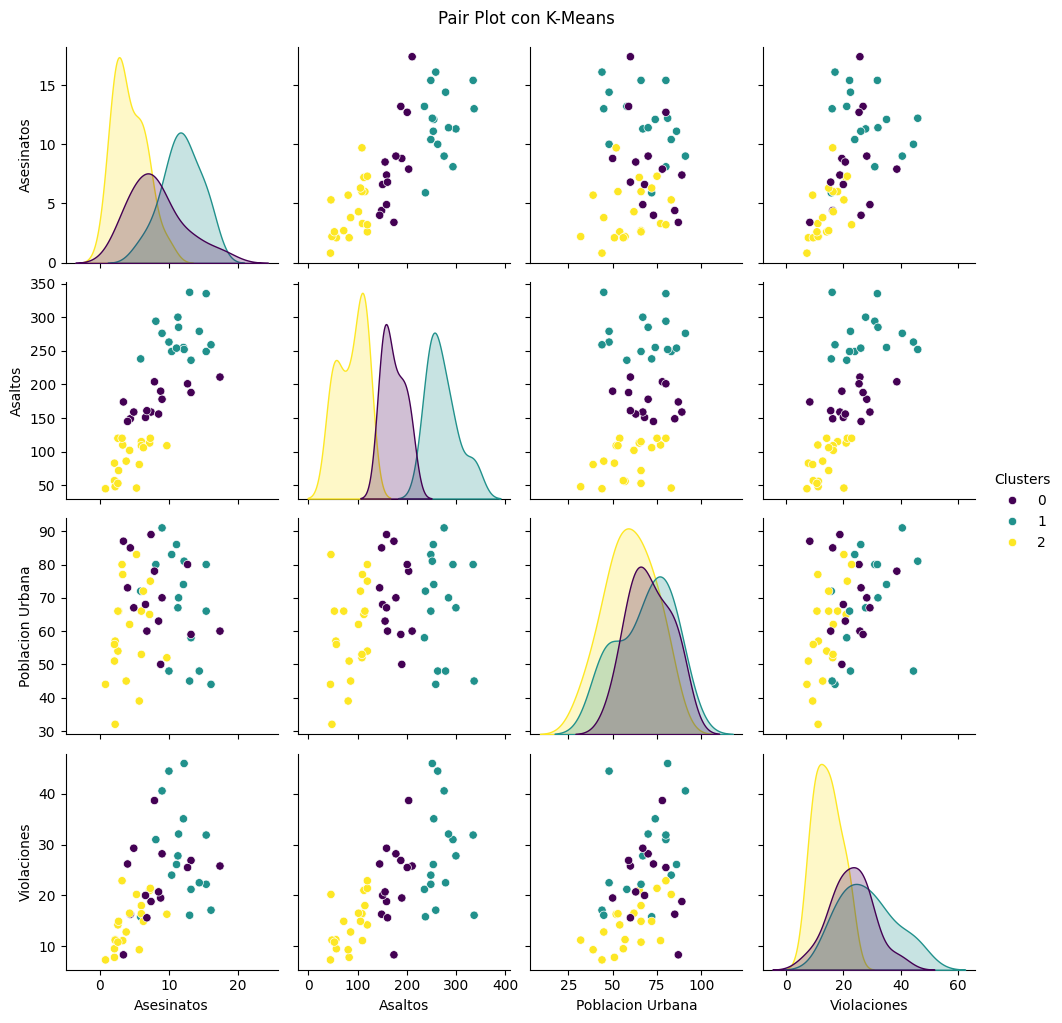

In [21]:
XKmeans = X
XKmeans["Clusters"] = clusters

sns.pairplot(XKmeans, hue='Clusters', palette='viridis')
plt.suptitle('Pair Plot con K-Means', y=1.02)
plt.show()

# MEAN SHIFT